<h1>Simple Static Example</h1>
    <h2>Intent</h2>
        <p> Roll-up calculations of system resources (e.g. total mass, cost, power, or another system dimension) are among the most common use cases in systems engineering. System engineers want to perform calculations based on the specific values of all the components in the system. The Simple Static Roll-up pattern provides system modelers a solution to solve common domain issues, and consists of standard constructs that are applicable to most domains.  If the modeler desires to perform analysis of a system where the values of the subsystem are independent of the system's behavior the Simple Static Roll-up pattern should be reused and applied in their domain specific construct </p>
    <h2>Motivation</h2>
        <p>The overall motivation for system engineers to apply the pattern is the desire to have requirements that are traced to to design artifacts, and to have a method to assert that a system design satisfies a set of requirements. Through SysML patterns, analysis specifications can be defined and the modeler can verify, for instance, whether the resource consumption of a system satisfies an initial requirement. If a system modeler wants to perform analysis of a complex system that consists of components whose value properties are state independent, and the modeler is familiarized with running simulations, the Simple Static Roll-up Pattern can be configured to their system.</p>
        <p>The Simple Static Roll-up supports the analysis of a system design which is independent of the component's operational states. The Simple Static Roll-up pattern can be applied to a model in which the product breakdown structure of the system is specified.  
The components aggregated in the roll-up must share a common value property that does not change (static) throughout the component's life-cycle. Through the application of the pattern, each component's static values can be recursively propagated up a hierarchy of components characterized by these values.</p>
        <p>To apply the pattern to a system, the modeler needs to augment the components of the system design for a particular resource in order to propagate the values up the system hierarchy.  The pattern must be configured to the system to specify the analysis context using the system's design, states, properties, and relationships. Only then can the pattern provide a context as to whether the design satisfies a set of formalized requirements.</p>
    <h2>Concept</h2>
        <p>The Simple Static Roll-up pattern consists of the following model elements; the Simple Static Resource Roll-up Aspect block, and the static values of the components in a system that are to be summed.</p>
        <p>One method of propagating the static values of a system is applying an aspect block, which calculates the total value (totalProperty) of the static property (staticProperty). The rollup takes in systems as its parameter, and every system that is part of the rollup aspect analysis is factored into the calculation of totalProperty which is calculated from the sum of the static properties of the subcomponents or children systems and then an additional offset is added which accounts for any other factors that may affect the final value. The children in this rollup pattern are defined as Systems, which all have the staticProperty attribute. Within the rollup aspect block, there may be an infinite amount of children and so the system part in the rollup aspect is marked with an astrisk which represents that there can be any number of child systems passed into the rollup. </p>

In [16]:
package Pattern{
    package ResourceRollupAspect{
        import Structure::*;
        import RealFunctions::*;
        
        part def 'Simple Static Resource Rollup Aspect'{
            part system : System [0..*];
            
            attribute offset : Real = 0.0;
            attribute totalProperty : Real = sum(system.staticProperty) + offset;
            
        }
        
    }
    package Structure{
        import ScalarValues::Real;
        
        part def System {
            attribute staticProperty : Real;
        }
        part def Component specializes System;
    }
}

Package Pattern (111c49be-80c6-4fe9-af6b-64becb0e0b7e)


<h3>Visualization</h3>
<p>SysMl v2 is both a textual and graphical language, so in order to represent the text code in a graphical format, you need to use a visualization tool. In Jupyterlab this can be achieved by usin the '%viz' magic key. this is simply followed by the name of the package or part you would like to visualize. There are different view options which can be set using the '--view' command which allows you to set what type of 

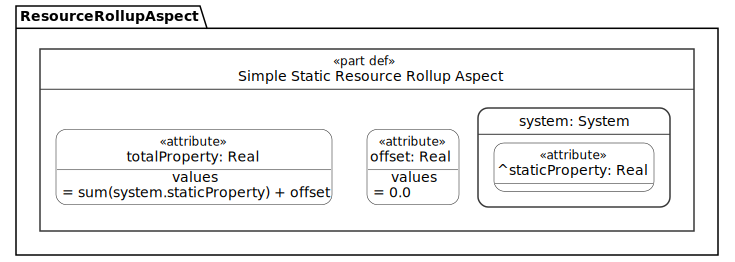

In [17]:
%viz Pattern::ResourceRollupAspect

<h2>Consequences</h2>
<p>There are several trade-offs to consider when configuring the Simple Static Roll-up pattern to the modeler's system.</p>
<table>
    <tr>
        <td> <h3> Action </h3></td>
        <td><h3>Consequence</h3></td>
    </tr>
    <tr>
        <td> Redefining the static value properties of the system's components</td>
        <td>By redefining the static value properties of the system's components, the modeler can modify the values. If the static value of a component isn't redefined, the value will default to the value of the base class. Redefinition provides a method for specifying the component's attributes such that the modeler can view and modify the aggregated value properties of the component's generalization hierarchy. This creates a full specification of the component being the leaf element in this hierarchy. </td>
    </tr>
    <tr>
        <td> Creating instance specifications to define the values of the system's components</td>
        <td>By creating instance specifications to define the initial values of the system, the modeler is able to track different configurations. New configurations for a scenario can be easily created and viewed in an instance table. The value properties are visible in the block specification.</td>
    </tr>
    <tr>
        <td>Modifying the system model when applying the roll-up pattern to the system	</td>
        <td> A consequence of needing to modify the system design results in an authority/ownership problem. An example of this occurs when an authority owns and modifies components of the system design and system decomposition. If another authority requires to perform a roll-up analysis of this design, they will need to augment the system design in order to define the relation between the system properties, e.g. the mass of one component is the sum of the mass of its children. A possible SysML work around is to use multi-classification at the instance specification level i.e. the instance specification is specified by the component classifier and the roll-up aspect classifier. The drawback to this approach is that the value properties are not visible in the block specification and only in the instance specification level.</td>
    </tr>
    <tr>
        <td>Subsetting all composition relationships of the system's hierarchy	</td>
        <td>The modeler must subset every element in the hierarchy which can become burdensome depending on the number of components and relationships in the system. A possible solution would be to use a reasoning tool to automate this process.</td>
    </tr>
</table>
    
    

<h2>Implementation</h2>
<p>The Simple Static pattern should be used if a modeler's system is linear. The breakdown structure of the system should only consist of one component or subsystem, and is specialized by an infinite amount of subcomponents. The unique quality of the pattern is that every subcomponent of the system shares only one static property that is independent of the component's behavior. By applying the pattern to a product breakdown structure, the modeler can calculate the sum of all the static property values. In this example, the sum of all the values for volume will be calculated. <p>
    <p>To apply the structure of the pattern to the Subsystem with Volume system, the Simple Static Roll-up Aspect needs to be augmented to reflect the value (volume) that is to be propagated in the system. The derived value property totalProperty has been modified to totalVolume and ownStaticProperty has been changed to volume. In the parametric model of the Analysis Context block, the totalVolume is equal to the total parameter, the volume of the Subsystem with Volume is equal to the child parameter, and the value of offset is equal to the offset parameter of the constraint.</p>
    <p>The Analysis block has been created to decouple the system design from its actual analysis, and for displaying the results of the volume propagation. The relationship between the Analysis Context block and the top level hierarchical component of the system is a whole-part relationship.</p>
    <p>All components of the system specialize the subsystem, and will inherit it's behavior and volume property. Either through redefinition or through instance specifications can the value of the volume property of the components be specified.</p>

In [18]:
package SimpleStaticVolumeExample{
    import Views::*;
    
    package Analysis{
        import RealFunctions::*; // import Real functions package so that you can sum values and do calculations
        import Structure::*; //Import all components of structure to be able to analyze structure components

        part def AnalysisContext{
            part subsystem : SubsystemWithVolume [0..*];
            
            //part subsystem : Subsystem [0..*];
            
            attribute offset : Real = 0.0;
            attribute totalVolume : Real = sum(subsystem.volume)+offset; 
                
        }
        
    }

    package Structure{
        import ScalarValues::Real;
        
        part def SubsystemWithVolume{
            attribute volume : Real;
        }

        part def ComponentA specializes SubsystemWithVolume;
        part def ComponentB specializes SubsystemWithVolume;
        part def ComponentC specializes SubsystemWithVolume;
        part def ComponentD specializes SubsystemWithVolume;

        
    }
    
}

Package SimpleStaticVolumeExample (51910698-7fab-481b-9ebc-886979a1d40c)


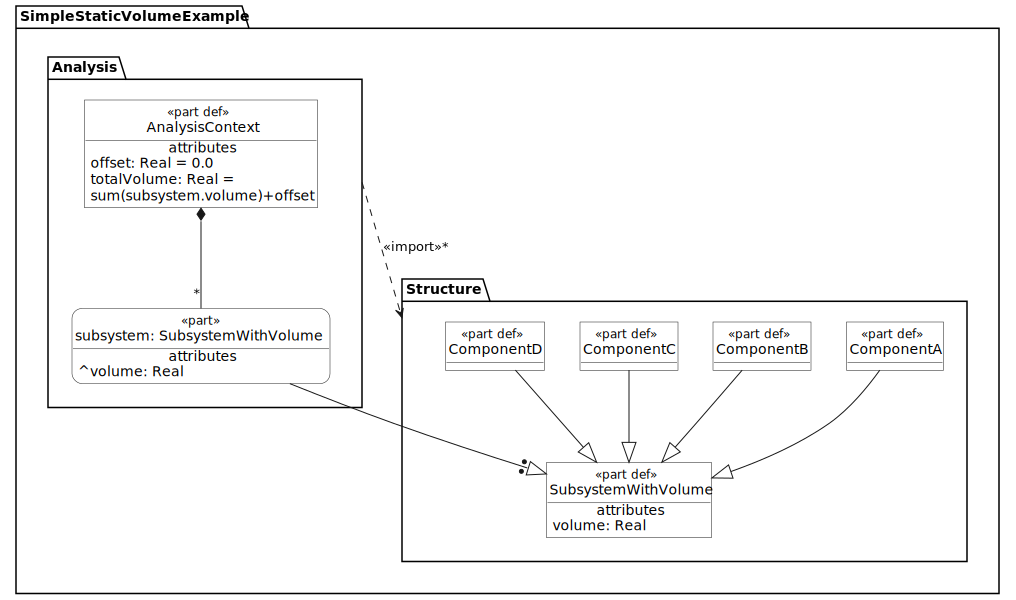

In [19]:
%viz --view=Default SimpleStaticVolumeExample 

<p>In this example, to define the value of volume for each component instance specifications have been created. In the instances of Components A, B, C, D the value for volume has been modified. </p>

In [20]:
import SimpleStaticVolumeExample::Analysis::*;
import SimpleStaticVolumeExample::Structure::*;
individual part def analysisContext :> AnalysisContext;
        
individual part analysisExample : analysisContext{
    part componentA : ComponentA subsets subsystem {
        attribute :>> volume = 10.0;
    }
    part componentB : ComponentB subsets subsystem {
        attribute :>> volume = 8.0;
    }
    part componentC : ComponentC subsets subsystem {
        attribute :>> volume = 2.5;
    }
    part componentD : ComponentD subsets subsystem {
        attribute :>> volume = 9.0;
    }
}


PartDefinition analysisContext (3ae7686f-a914-4f32-9437-68a36206d2b0)
PartUsage analysisExample (259c190b-9e79-494d-882b-582a0c28c4fa)


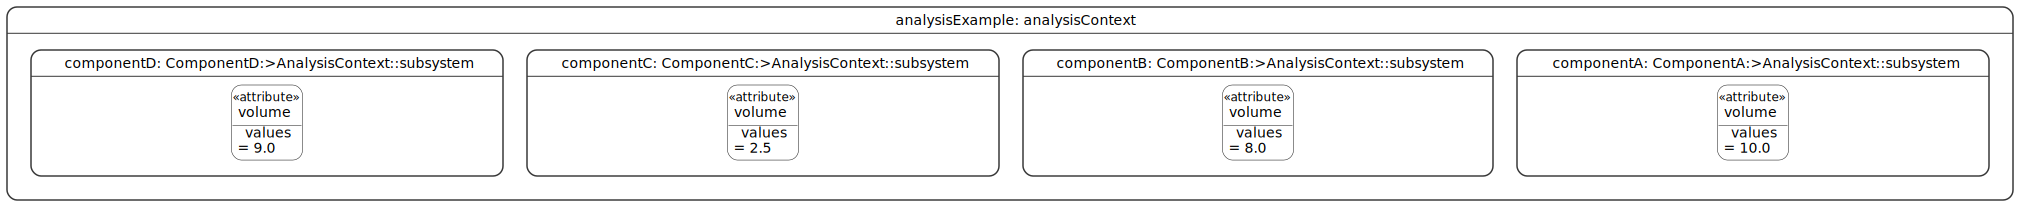

In [21]:
%viz --view=Interconnection analysisExample

<h2>Analysis</h2>
<p>The Simple Static Roll-up pattern helps to analyze a system model by demonstrating that the resource usage according to the system design satisfies a corresponding requirement for every defined specified scenario.</p>
<p>After configuring the Roll-up pattern to the system an analysis context needs to be specified. In this analysis context , any operational scenarios need to be specified (in either sequence or activity diagrams), and the values of the configurations need to be specified either through redefinition or instance specifications.</p>

<h2>Tooling</h2>
The Pattern shown supports implementation of the Simple Static Roll-up pattern in Jupyter Notebooks